In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
import scipy.stats
import numpy as np
from scipy.stats import truncnorm
from scipy.stats import multivariate_normal
from matplotlib import cbook, cm
from matplotlib.colors import LightSource
from scipy.stats import norm

In [26]:
N = 10_000
s_1 = np.zeros(N)
s_2 = np.zeros(N)
sig_t = 5
A = np.array([[1, -1]])
t = np.zeros(N)
sigma_s = np.array([[100, 0], [0, 100]]) 
mu_matrix = np.array([100, 100]) 

s_1[0] = 100
s_2[0] = 100
t[0] = 20


In [54]:
def gibbs_sample(N, mu_s1, var_s1, mu_s2, var_s2, t_param, var_t):

    s_1 = np.zeros(N)
    s_2 = np.zeros(N)
    t = np.zeros(N)


    sigma_s = np.array([[var_s1, 0], [0, var_s2]]) 
    mu_matrix = np.array([mu_s1, mu_s2]) 

    s_1[0] = mu_s1
    s_2[0] = mu_s2
    t[0] = t_param


    sig_t = var_t
    A = np.array([[1, -1]])


    y = 1
    a, b = 0, np.inf

    # mu_t = s_1[0]-s_2[0]

    for n in range(N-1):
        mu_t = s_1[n]-s_2[n]

        if y == 1: # between 0 and inf
            t[n+1] = truncnorm.rvs(a, b, loc=mu_t, scale=sig_t, size=1)
        else: # between -inf and 0
            t[n+1] = truncnorm.rvs(-b, a, loc=mu_t, scale=sig_t, size=1)
        
        sigma_st = np.linalg.inv(np.linalg.inv(sigma_s) + A.transpose()*(sig_t**(-1))*A)
        mu_st = np.matmul(sigma_st,(np.matmul(np.linalg.inv(sigma_s),mu_matrix) + A.transpose()*(sig_t**(-1))*t[n+1]))
        new_s = np.random.multivariate_normal([mu_st[0][0], mu_st[1][0]], sigma_st)
        s_1[n+1] = new_s[0]
        s_2[n+1] = new_s[1]

    return(s_1, s_2, t)

In [62]:
iter = 10000
s1, s2, t = gibbs_sample(iter, 100, 20, 100, 20, 20, 20)

Text(0.5, 1.0, 't dist')

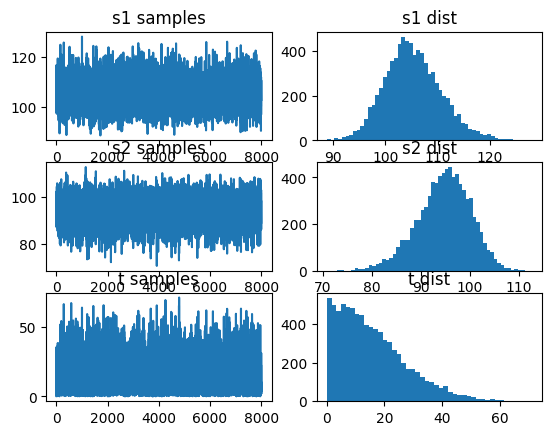

In [63]:
burnin = 2000

iterations_num = [i + 1 for i in range(iter-burnin)]


fig, axs = plt.subplots(3, 2)

axs[0, 0].plot(iterations_num,s1[burnin:])
axs[0, 0].set_title("s1 samples")
axs[0, 1].hist(s1[burnin:],bins = "auto")
axs[0, 1].set_title("s1 dist")
axs[1, 0].plot(iterations_num,s2[burnin:])
axs[1, 0].set_title("s2 samples")
axs[1, 1].hist(s2[burnin:],bins = "auto")
axs[1, 1].set_title("s2 dist")
axs[2, 0].plot(iterations_num,t[burnin:])
axs[2, 0].set_title("t samples")
axs[2, 1].hist(t[burnin:],bins = "auto")
axs[2, 1].set_title("t dist")



# plt.plot(iterations_num,s1[burnin:])
# plt.show()
# plt.hist(s1[burnin:],bins = "auto")
# plt.show()
# plt.plot(iterations_num,s2[burnin:])
# plt.show()
# plt.hist(s2[burnin:],bins = "auto")
# plt.show()
# plt.plot(iterations_num,t[burnin:])
# plt.show()
# plt.hist(t[burnin:],bins = "auto")
# plt.show()